In [1]:
# set the working directory to be the root of the package
# so that the imports work below
import sys
sys.path.append("..")

In [2]:
import numpy as np
import pandas as pd
import sklearn as skl
import matplotlib.pyplot as plt
from xgboost import plot_tree
import models.xgb as xgb
import models.data_util

In [17]:
data_file = "../data/clean.pkl"  # set this accordingly
model_file = "../data/xgb_model.bin"
col_names = pd.read_pickle(data_file).columns

In [4]:
# Use helper function to convert everything to numpy etc:
x, y_true = models.data_util.load_raw_data(data_file)

In [5]:
# load model
model = xgb.from_file(model_file)

In [6]:
# predict probabilities of positive class:
y_pred = model.predict_proba(x).T[1].T
print(y_pred)

[0.49999517 0.49999517 0.49999517 ... 0.50000036 0.50000036 0.50000036]


In [7]:
# get ROC graph
fpr, tpr, thresholds = skl.metrics.roc_curve(y_true, y_pred)

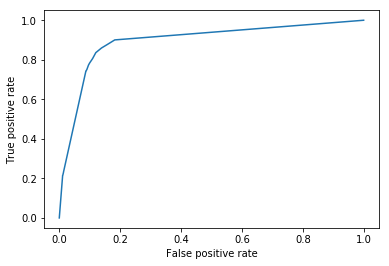

In [8]:
plt.plot(fpr, tpr)
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.show()

In [9]:
print("Area =", skl.metrics.auc(fpr, tpr))

Area = 0.8947267976588629


Now let's visualise the resulting tree:


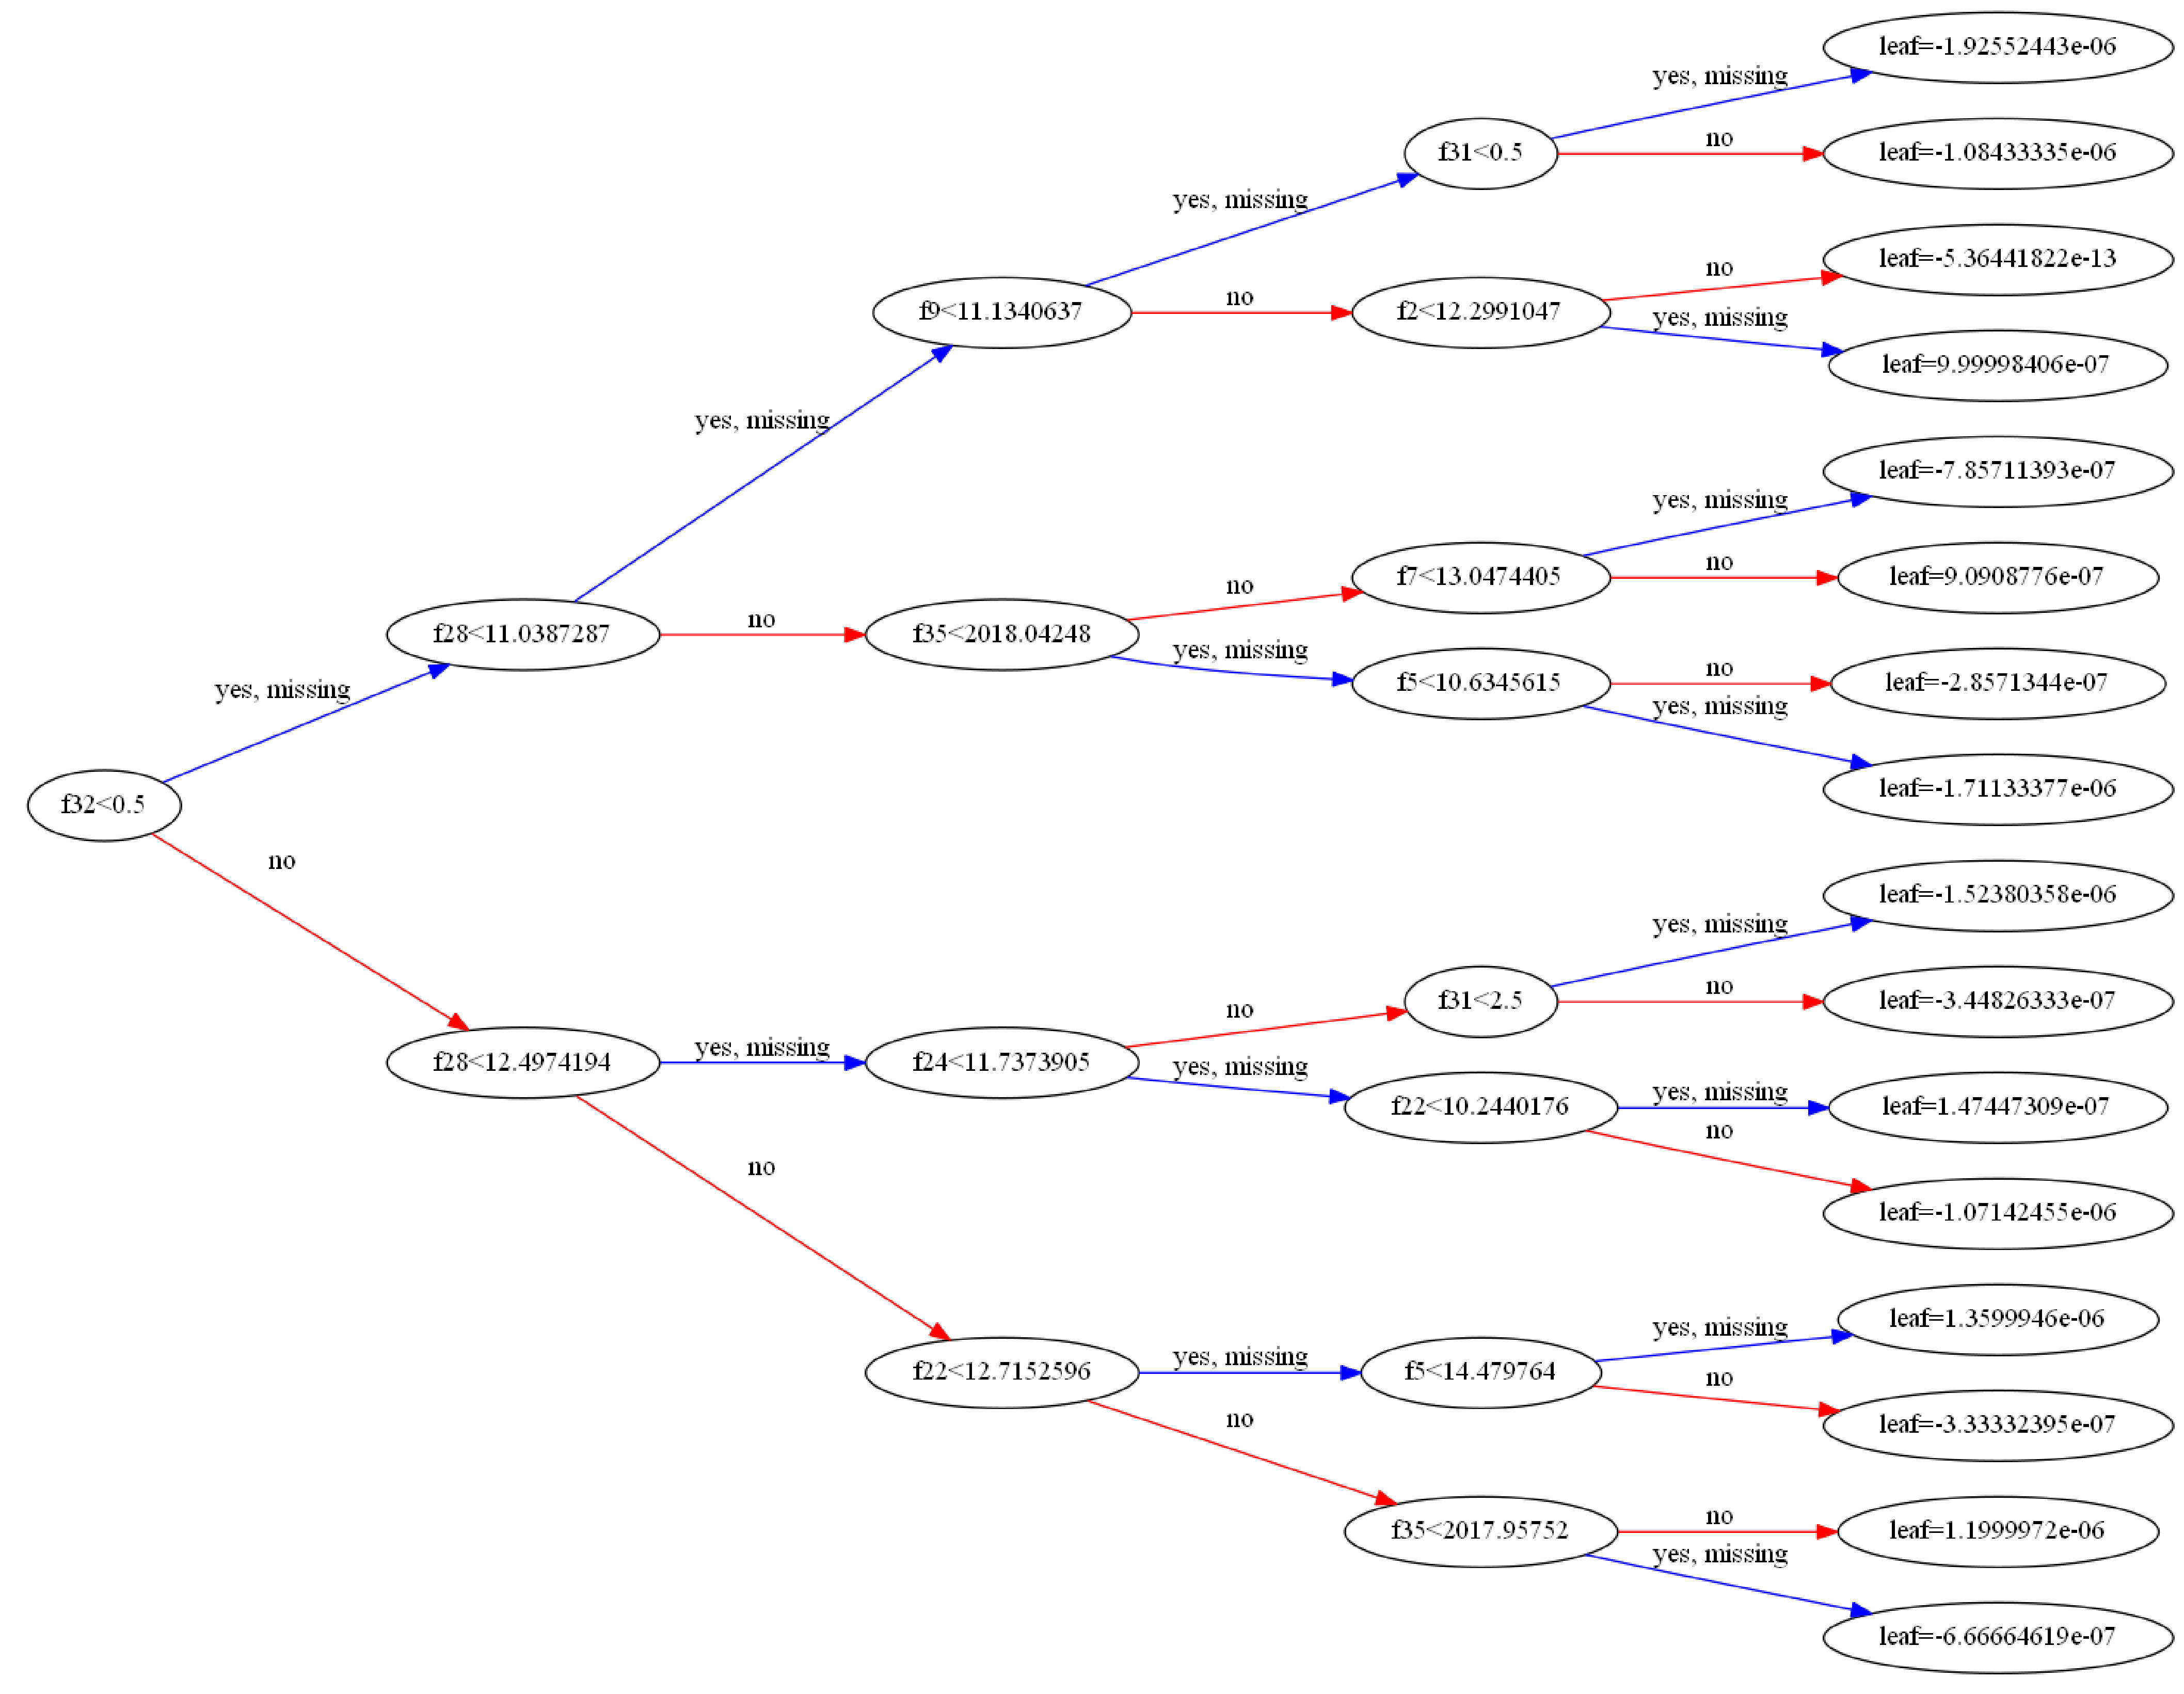

In [19]:
print("Now let's visualise the resulting tree:")
fig, ax = plt.subplots(figsize=(75, 75))
plot_tree(model, rankdir='LR', num_trees=4, ax=ax)
plt.show()